<h1><center> Figure 2: boxplots of betas and intercepts (rows) by models (columns) </center></h1>

In [1]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import xarray as xr
import pandas as pd
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from glob import glob
import os
import subprocess
import seaborn as sns
import IPython.display as display
%matplotlib inline

##  make the graphs with biovolume now


In [4]:
file_list = glob('/Users/mc4214/CMIP6_biome_PSS_data/*.nc')

file_list_biovol = [x for x in file_list if 'biovolume' in x]


In [5]:
file_list_biovol

['/Users/mc4214/CMIP6_biome_PSS_data/biom_CNRM_PSS_hist_biovolume.nc',
 '/Users/mc4214/CMIP6_biome_PSS_data/biom_CESM_PSS_ssp5_biovolume.nc',
 '/Users/mc4214/CMIP6_biome_PSS_data/biom_IPSL_PSS_hist_biovolume.nc',
 '/Users/mc4214/CMIP6_biome_PSS_data/biom_GFDL_PSS_hist_biovolume.nc',
 '/Users/mc4214/CMIP6_biome_PSS_data/biom_CNRM_PSS_ssp5_biovolume.nc',
 '/Users/mc4214/CMIP6_biome_PSS_data/biom_CESM_PSS_hist_biovolume.nc',
 '/Users/mc4214/CMIP6_biome_PSS_data/biom_GFDL_PSS_ssp5_biovolume.nc',
 '/Users/mc4214/CMIP6_biome_PSS_data/biom_IPSL_PSS_ssp5_biovolume.nc',
 '/Users/mc4214/CMIP6_biome_PSS_data/biom_UKESM_PSS_hist_biovolume.nc',
 '/Users/mc4214/CMIP6_biome_PSS_data/biom_GISS_PSS_ssp5_biovolume.nc',
 '/Users/mc4214/CMIP6_biome_PSS_data/biom_CMCC_PSS_ssp5_biovolume.nc',
 '/Users/mc4214/CMIP6_biome_PSS_data/biom_UKESM_PSS_ssp5_biovolume.nc',
 '/Users/mc4214/CMIP6_biome_PSS_data/biom_GISS_PSS_hist_biovolume.nc',
 '/Users/mc4214/CMIP6_biome_PSS_data/biom_CMCC_PSS_hist_biovolume.nc']

In [6]:
model_list = ['CESM', 'CMCC','CNRM','GFDL', 'GISS','IPSL','UKESM']
ds_dict = {}
ds_dict['hist'] = {}
ds_dict['ssp5'] = {}
for e in ['hist', 'ssp5']: 
    for m in model_list:
        model_path = [x for x in file_list_biovol if e in x and m in x]
        ds_dict[e][m]= xr.open_mfdataset(model_path)#.mean(dim=['time'])

In [7]:
file_list_biovol

['/Users/mc4214/CMIP6_biome_PSS_data/biom_CNRM_PSS_hist_biovolume.nc',
 '/Users/mc4214/CMIP6_biome_PSS_data/biom_CESM_PSS_ssp5_biovolume.nc',
 '/Users/mc4214/CMIP6_biome_PSS_data/biom_IPSL_PSS_hist_biovolume.nc',
 '/Users/mc4214/CMIP6_biome_PSS_data/biom_GFDL_PSS_hist_biovolume.nc',
 '/Users/mc4214/CMIP6_biome_PSS_data/biom_CNRM_PSS_ssp5_biovolume.nc',
 '/Users/mc4214/CMIP6_biome_PSS_data/biom_CESM_PSS_hist_biovolume.nc',
 '/Users/mc4214/CMIP6_biome_PSS_data/biom_GFDL_PSS_ssp5_biovolume.nc',
 '/Users/mc4214/CMIP6_biome_PSS_data/biom_IPSL_PSS_ssp5_biovolume.nc',
 '/Users/mc4214/CMIP6_biome_PSS_data/biom_UKESM_PSS_hist_biovolume.nc',
 '/Users/mc4214/CMIP6_biome_PSS_data/biom_GISS_PSS_ssp5_biovolume.nc',
 '/Users/mc4214/CMIP6_biome_PSS_data/biom_CMCC_PSS_ssp5_biovolume.nc',
 '/Users/mc4214/CMIP6_biome_PSS_data/biom_UKESM_PSS_ssp5_biovolume.nc',
 '/Users/mc4214/CMIP6_biome_PSS_data/biom_GISS_PSS_hist_biovolume.nc',
 '/Users/mc4214/CMIP6_biome_PSS_data/biom_CMCC_PSS_hist_biovolume.nc']

In [8]:
ds_dict['ssp5']['GFDL']

<xarray.Dataset>
Dimensions:               (time: 360, lat: 180, lon: 360, biovol_um3: 50)
Coordinates:
  * time                  (time) object 2071-01-16 12:00:00 ... 2100-12-16 12...
  * lat                   (lat) float64 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * lon                   (lon) float64 -179.5 -178.5 -177.5 ... 178.5 179.5
  * biovol_um3            (biovol_um3) float64 0.09575 0.181 ... 3.104e+12
Data variables: (12/21)
    biomes                (lat, lon) float64 dask.array<chunksize=(180, 360), meta=np.ndarray>
    chl                   (time, lat, lon) float64 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    NB                    (biovol_um3, time, lat, lon) float64 dask.array<chunksize=(50, 360, 180, 360), meta=np.ndarray>
    total_biovolume_ssp5  (time, lat, lon) float64 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    betas_ssp5            (time, lat, lon) float64 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    intercept_ssp5        (time, lat, lon) float64 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    ...                    ...
    phymisc_per           (time, lat, lon) float32 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    phydiat_per           (time, lat, lon) float32 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    zmicro_per            (time, lat, lon) float32 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    zmeso_per             (time, lat, lon) float32 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    phyc                  (time, lat, lon) float32 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>
    zooc                  (time, lat, lon) float32 dask.array<chunksize=(360, 180, 360), meta=np.ndarray>

In [15]:
model=list()
model

[]

In [27]:
#  get table 3
model=list()
experiment=list()

median_slope=list()
min_slope=list()
max_slope=list()

median_intercept=list()
min_intercept=list()
max_intercept=list()

median_biovolume=list()
min_biovolume=list()
max_biovolume=list()

median_R2=list()
min_R2=list()
max_R2=list()

median_Allbiovolume=list()
min_Allbiovolume=list()
max_Allbiovolume=list()

for m in ds_dict['ssp5'].keys():
    for e in ds_dict.keys():
        
        model.append(m)
        experiment.append(e)

        median_slope.append(np.nanmedian(ds_dict[e][m][('betas_'+e)]))
        min_slope.append(np.nanmin(ds_dict[e][m][('betas_'+e)]))
        max_slope.append(np.nanmax(ds_dict[e][m][('betas_'+e)]))

        median_intercept.append(np.nanmedian(ds_dict[e][m][('intercept_'+e)]))
        min_intercept.append(np.nanmin(ds_dict[e][m][('intercept_'+e)]))
        max_intercept.append(np.nanmax(ds_dict[e][m][('intercept_'+e)]))

        median_biovolume.append(np.nanmedian(ds_dict[e][m][('total_biovolume_'+e)]))
        min_biovolume.append(np.nanmin(ds_dict[e][m][('total_biovolume_'+e)]))
        max_biovolume.append(np.nanmax(ds_dict[e][m][('total_biovolume_'+e)]))
        
        median_R2.append(np.nanmedian(ds_dict[e][m][('R2_'+e)]))
        min_R2.append(np.nanmin(ds_dict[e][m][('R2_'+e)]))
        max_R2.append(np.nanmax(ds_dict[e][m][('R2_'+e)]))

        median_Allbiovolume.append(np.nanmedian(ds_dict[e][m][('total_biovolume_full')]))
        min_Allbiovolume.append(np.nanmin(ds_dict[e][m][('total_biovolume_full')]))
        max_Allbiovolume.append(np.nanmax(ds_dict[e][m][('total_biovolume_full')]))

dict_median={'models':model, 'experiment':experiment, 'median_slope':median_slope, 'min_slope':min_slope, 'max_slope':max_slope, 
             'median_intercept':median_intercept, 'min_intercept':min_intercept, 'max_intercept':max_intercept, 
             'median_biovolume':median_biovolume, 'min_biovolume':min_biovolume, 'max_biovolume':max_biovolume,
             'median_R2':median_R2, 'min_R2':min_R2, 'max_R2':max_R2,
             'median_Allbiovolume':median_Allbiovolume, 'min_Allbiovolume':min_Allbiovolume, 'max_Allbiovolume':max_Allbiovolume}
df_medians = pd.DataFrame(dict_median)

df_medians.to_csv('/Users/mc4214/GIT/CMIP6_size_spectra/data/Table_3.csv', sep= ',', index = False)

In [20]:
df_medians

,models,experiment,median_slope,min_slope,max_slope,median_intercept,min_intercept,max_intercept,median_biovolume,min_biovolume,max_biovolume,median_Allbiovolume,min_Allbiovolume,max_Allbiovolume
0,CESM,hist,-1.066118,-1.466350,-0.264979,2.028376e+13,7.270048e+06,1.268659e+15,3.088375e+13,1.781244e+10,3.372568e+14,4.554223e+14,3.910081e+11,6.109840e+16
1,CESM,ssp5,-1.067569,-1.307257,-0.046528,1.922066e+13,1.161267e+04,1.141477e+15,2.927907e+13,2.335715e+11,2.456715e+14,4.151373e+14,1.470390e+12,5.482285e+16
2,CMCC,hist,-1.145756,-1.414426,-0.964676,3.888084e+13,2.765178e+10,3.987648e+14,5.466235e+13,2.333732e+11,4.115409e+15,2.790459e+14,7.222574e+11,1.756437e+16
3,CMCC,ssp5,-1.151974,-1.574241,-0.990044,3.799232e+13,3.226165e+10,5.319332e+14,4.583653e+13,3.192693e+11,4.240295e+15,2.456197e+14,9.465377e+11,1.812783e+16
4,CNRM,hist,-1.242919,-1.470693,-0.865880,4.088973e+14,8.347489e+12,6.734215e+15,2.401478e+13,1.132971e+12,6.015158e+15,9.631971e+15,8.220809e+14,2.045404e+18
5,CNRM,ssp5,-1.262700,-1.445094,-1.120305,4.164689e+14,8.644617e+12,6.789735e+15,1.794857e+13,2.342286e+12,5.439676e+14,8.833454e+15,7.213597e+14,2.599593e+18
6,GFDL,hist,-1.154270,-1.381293,-0.902864,9.319725e+14,1.369770e+08,3.392084e+16,2.992368e+14,7.647395e+09,3.023089e+15,1.174877e+16,1.450193e+10,7.886490e+17
7,GFDL,ssp5,-1.158388,-1.352429,-0.901950,8.297480e+14,1.967755e+08,3.266435e+16,2.564760e+14,7.212795e+09,2.838726e+15,9.757644e+15,1.741287e+10,7.774469e+17
8,GISS,hist,-1.661466,-3.454392,-0.662548,4.305864e+17,1.071894e+10,1.301075e+22,1.075037e+13,1.218806e+02,4.798641e+14,8.666663e+16,2.095738e+11,1.032438e+19
9,GISS,ssp5,-1.675853,-3.593988,-0.824533,4.205596e+17,2.518112e+11,2.966505e+22,7.606460e+12,1.817091e+01,3.683292e+14,8.183699e+16,3.205111e+10,1.091970e+19


In [34]:
#d = {'model':[], 'biome':[], 'experiment':[], 'betas':[], 'intercept':[]}
df_NBSS = pd.DataFrame()

In [35]:
for m in model_list:
    for b in [1, 2, 3]:
        for e in ['hist', 'ssp5']: 
            df= pd.DataFrame()
            df['betas'] = pd.Series(ds_dict[e][m]['betas_'+e].where(ds_dict[e][m]['biomes']==b).where(ds_dict[e][m]['betas_'+e] != float('-inf')).values.ravel())
            df['intercept'] = pd.Series(ds_dict[e][m]['intercept_'+e].where(ds_dict[e][m]['biomes']==b).where(ds_dict[e][m]['intercept_'+e] != float('-inf')).values.ravel())
            df['total_biovolume'] = pd.Series(ds_dict[e][m]['total_biovolume_'+e].where(ds_dict[e][m]['biomes']==b).where(ds_dict[e][m]['total_biovolume_'+e] != float('-inf')).values.ravel())
            df['R2'] = pd.Series(ds_dict[e][m]['R2_'+e].where(ds_dict[e][m]['biomes']==b).where(ds_dict[e][m]['R2_'+e] != float('-inf')).values.ravel())
            df= df[~df['betas'].isna()].reset_index(drop=True)
            df= df[~df['intercept'].isna()].reset_index(drop=True)
            df= df[~df['total_biovolume'].isna()].reset_index(drop=True)
            df= df[~df['R2'].isna()].reset_index(drop=True)
            df['experiment'] = e
            if b ==1:
                df['biomes'] = 'LC'
            elif b ==2:
                df['biomes'] = 'HCSS'
            elif b ==3:
                df['biomes'] = 'HCPS'
            df['model'] = m
            df_NBSS= pd.concat([df_NBSS, df])


In [36]:
df_NBSS.rename(columns={'betas':'slope', 'model':'source'}, inplace=True)

In [37]:
df_NBSS.head()

,slope,intercept,total_biovolume,R2,experiment,biomes,source
0,-1.097475,4.872843e+13,5.104023e+13,0.996400,hist,LC,CESM
1,-1.097611,4.843630e+13,5.056010e+13,0.996380,hist,LC,CESM
2,-1.098033,4.850268e+13,5.025458e+13,0.996383,hist,LC,CESM
3,-1.098720,4.895519e+13,5.024621e+13,0.996440,hist,LC,CESM
4,-1.099769,4.993240e+13,5.051188e+13,0.996524,hist,LC,CESM


In [38]:
df_NBSS.to_csv('/Users/mc4214/CMIP6_biome_PSS_data/df_NBSS_for_data_dist_figs_biovolume.csv', sep= ',', index = False)

## Start from here if the data was already generated (putting the csv file takes a long time)

In [2]:
df_NBSS=pd.read_csv('/Users/mc4214/CMIP6_biome_PSS_data/df_NBSS_for_data_dist_figs_biovolume.csv', sep=',')
#df_NBSS['intercept']= 10**(df_NBSS['intercept'])

In [3]:
#df_NBSS=pd.concat([df_NBSS, df_pssdb]).reset_index(drop=True)
#df_NBSS['total_biovolume']= np.log10(df_NBSS['total_biovolume'])
#df_NBSS['intercept']= np.log10(df_NBSS['intercept'])
df_NBSS

,slope,intercept,total_biovolume,R2,experiment,biomes,source
0,-1.097475,4.872843e+13,5.104023e+13,0.996400,hist,LC,CESM
1,-1.097611,4.843630e+13,5.056010e+13,0.996380,hist,LC,CESM
2,-1.098033,4.850268e+13,5.025458e+13,0.996383,hist,LC,CESM
3,-1.098720,4.895519e+13,5.024621e+13,0.996440,hist,LC,CESM
4,-1.099769,4.993240e+13,5.051188e+13,0.996524,hist,LC,CESM
...,...,...,...,...,...,...,...
196747117,-1.241028,1.035401e+14,7.687767e+12,0.985927,ssp5,HCPS,UKESM
196747118,-1.238945,1.028225e+14,7.960712e+12,0.985924,ssp5,HCPS,UKESM
196747119,-1.238146,1.005986e+14,7.938840e+12,0.985991,ssp5,HCPS,UKESM
196747120,-1.237731,9.771767e+13,7.801258e+12,0.986048,ssp5,HCPS,UKESM


In [21]:
df_NBSS.replace([np.inf, -np.inf], np.nan, inplace=True)


In [22]:
df_NBSS=df_NBSS.dropna().reset_index(drop=True)
#df_NBSS 

In [23]:
palette_experiments= dict(hist='rosybrown', ssp5='firebrick', obs='blue')

In [8]:
np.min(df_NBSS.total_biovolume)

18.1709115203072

In [2]:
from matplotlib.legend import Legend
from matplotlib.ticker import FormatStrFormatter
import matplotlib.ticker as tick
from matplotlib import ticker as mticker
def y_fmt(x, y):
    return '${:1.0e}'.format(x).replace('e', '\\times 10^{') + '}$'

In [10]:
#df_pssdb = df_NBSS.loc[df_NBSS.experiment=='obs'].reset_index(drop=True)
#df_NBSS = df_NBSS.loc[df_NBSS.experiment!='obs'].reset_index(drop=True)

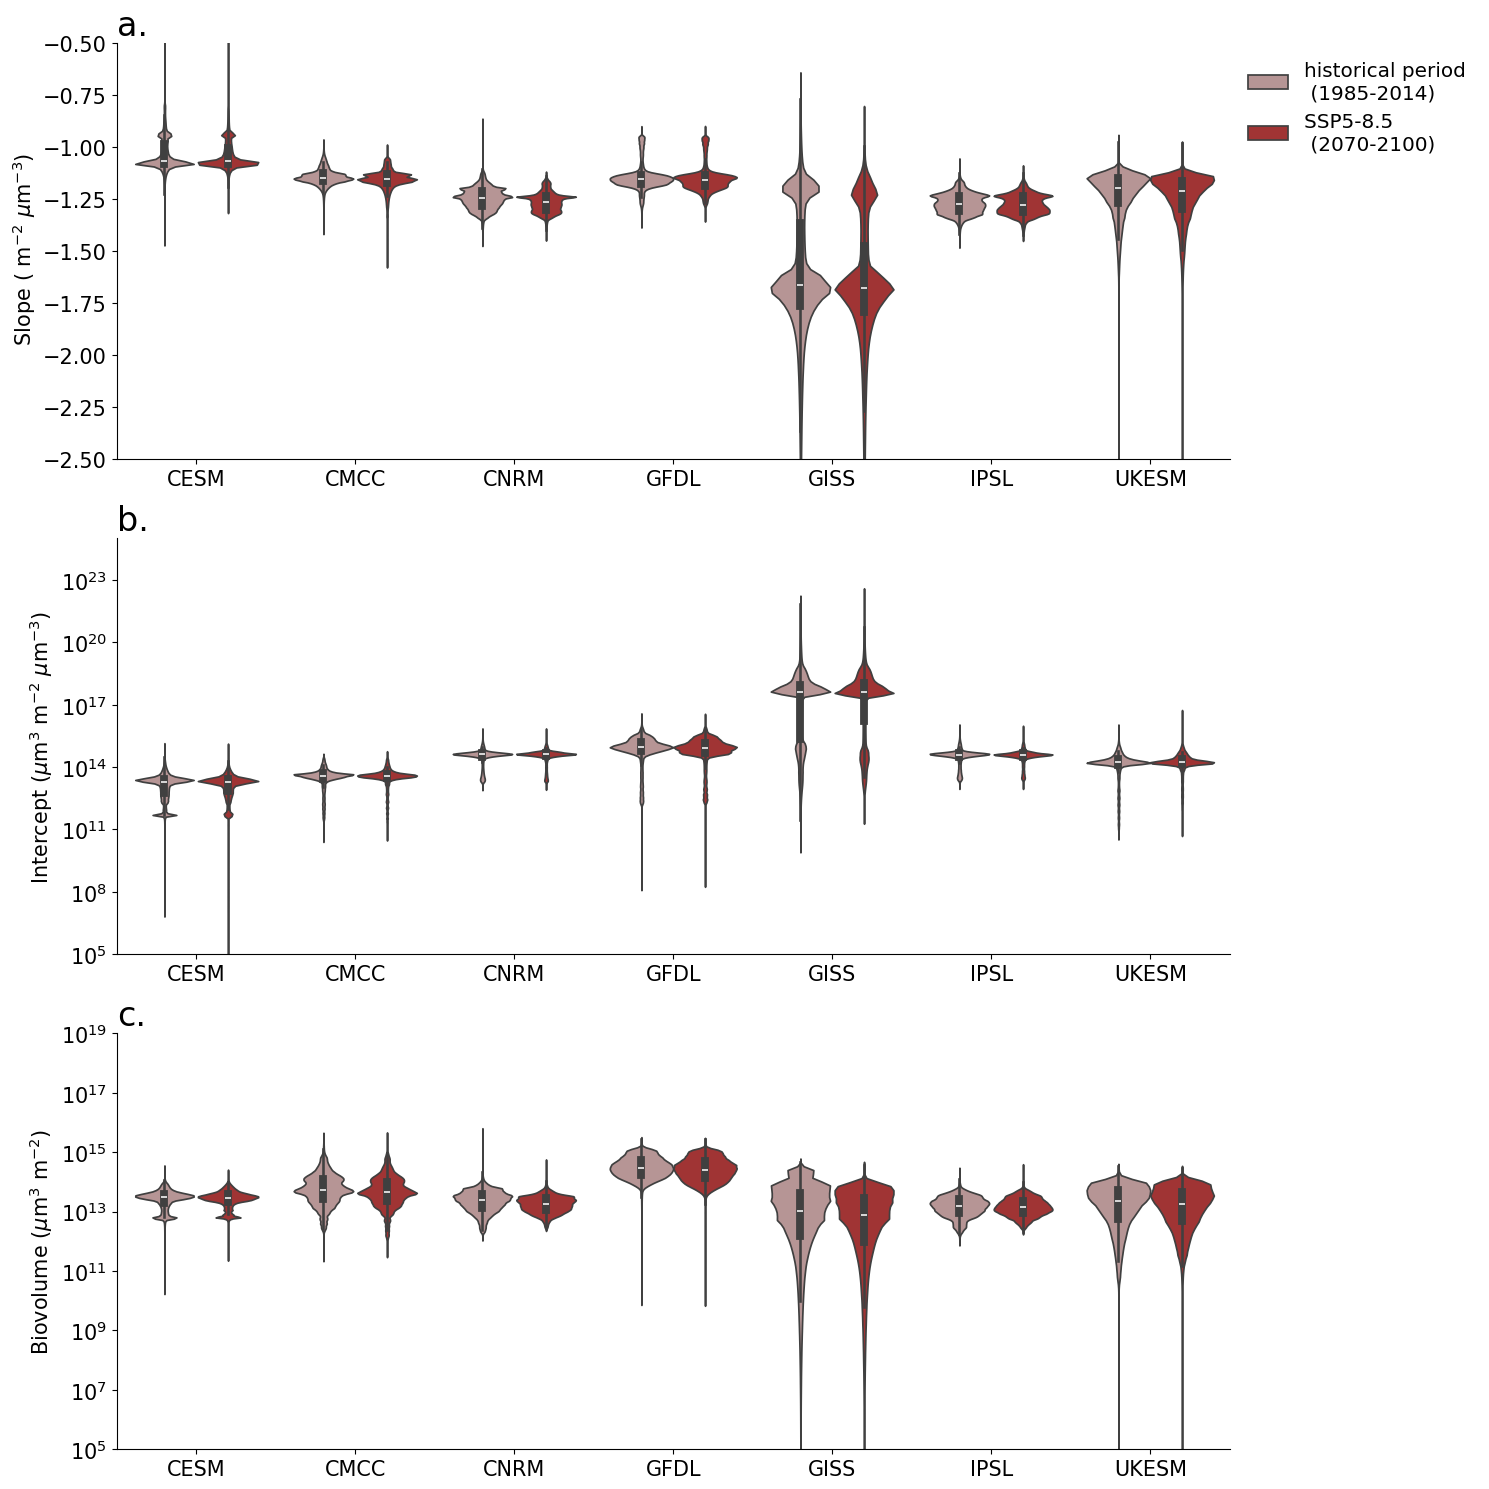

In [41]:
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(15,15))
letters = ['a.','b.','c.']
ind=0
variables = ['slope', 'intercept', 'total_biovolume']
for r, var in enumerate(variables):
    ind +=1
    axs[r].set_title(letters[ind-1], loc='left', fontsize=24)
    if var == 'slope':
        plot = sns.violinplot(ax = axs[r], x="source", y=var, hue="experiment",palette=palette_experiments, fill=True, density_norm="count", data=df_NBSS) #, flierprops=dict(marker='o', markersize=0.5)
        plot.tick_params(axis='both', which='major', labelsize=15)
        sns.despine(top = True, right = True)
        axs[r].set_ylim([-2.5, -0.5])
        axs[r].set_ylabel(r' Slope ( m$^{-2}$ $\mu$m$^{-3}$)', fontsize = 15)
        L = axs[r].legend(title='', fontsize = 'x-large',  markerscale=10, frameon=False, bbox_to_anchor=(1, 1))
        L.get_texts()[0].set_text('historical period \n (1985-2014)')
        L.get_texts()[1].set_text('SSP5-8.5 \n (2070-2100)')
        #L.get_texts()[2].set_text('observations \n (PSSdb)')

    elif var == 'intercept':
        plot = sns.violinplot(ax = axs[r], x="source", y=var, hue="experiment",palette=palette_experiments,  fill=True,  density_norm="count",data=df_NBSS, log_scale=True) #, flierprops=dict(marker='o', markersize=0.5)
        plot.tick_params(axis='both', which='major', labelsize=15)
        sns.despine(top = True, right = True)
        axs[r].set_ylabel(r'Intercept ($\mu$m$^{3}$ m$^{-2}$ $\mu$m$^{-3}$)', fontsize = 15)
        axs[r].set_ylim([1e5, 1e25])
        #axs[r].yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))
        #ymin, ymax = axs[r].get_ylim()
        #tick_range = np.arange(np.floor(ymin), ymax)
        #axs[r].yaxis.set_ticks(tick_range)
        #axs[r].yaxis.set_major_locator(plt.MaxNLocator(6))
        #axs[r].yaxis.set_ticks([np.log10(x) for p in tick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)
        axs[r].get_legend().remove()
        
    elif var == 'total_biovolume':
        plot = sns.violinplot(ax = axs[r], x="source", y=var, hue="experiment",palette=palette_experiments,  fill=True, density_norm="count",data=df_NBSS, log_scale=True) #, flierprops=dict(marker='o', markersize=0.5)
        plot.tick_params(axis='both', which='major', labelsize=15)
        sns.despine(top = True, right = True)
        axs[r].set_ylabel(r'Biovolume ($\mu$m$^{3}$ m$^{-2}$)', fontsize = 15)
        axs[r].set_ylim([1e5, 1e19])
        #axs[r].set_yscale('log')
        #axs[r].yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))
        #ymin, ymax = axs[r].get_ylim()
        #tick_range = np.arange(np.floor(ymin), ymax)
        #axs[r].yaxis.set_ticks(tick_range)
        #axs[r].yaxis.set_major_locator(plt.MaxNLocator(6))
        #axs[r].yaxis.set_ticks([np.log10(x) for p in tick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)
        axs[r].get_legend().remove()
    axs[r].set_xlabel('')
        
plt.tight_layout()
plt.savefig('/Users/mc4214/GIT/CMIP6_size_spectra/figures/fig_model_avg_biovolume.pdf', dpi=300)

In [49]:
10**(np.nanmean(np.log10(df_NBSS.intercept[(df_NBSS.source=='GISS') & (df_NBSS.experiment=='hist')])))

8.148897865866437e+16

In [23]:
df_pssdb = pd.read_csv('/Users/mc4214/Documents/CMIP6_PSS_paper/data/PSSdb_data/PSSdb_data_full.csv', sep= ',')
df_pssdb = df_pssdb.drop(columns = ['lat', 'lon', 'month', 'season'])
#df_pssdb['total_biovolume']= np.log10(df_pssdb['total_biovolume'])
df_pssdb['intercept']= 10**(df_pssdb['intercept'])
df_pssdb.head()

,biomes,slope,intercept,R2,total_biovolume,experiment,source
0,HCSS,-0.7116,3.426846e+10,0.94760,4.614245e+15,obs,PSSdb
1,HCSS,-1.0136,3.871730e+13,0.96615,9.110387e+16,obs,PSSdb
2,HCSS,-0.7279,1.123603e+11,0.86505,6.869221e+17,obs,PSSdb
3,HCSS,-0.8294,1.758717e+12,0.98330,1.754292e+17,obs,PSSdb
4,HCSS,-0.6849,7.799207e+10,0.95075,3.726014e+17,obs,PSSdb


In [28]:
print(np.nanmedian(df_pssdb['slope']))
print(np.nanmedian(df_pssdb['intercept']))
print(np.nanmedian(df_pssdb['total_biovolume']))
print(np.nanmedian(df_pssdb['R2']))

-1.047
37084809925507.48
1.0352724622899924e+16
0.9715


In [30]:
print(np.nanmin(df_pssdb['slope']))
print(np.nanmin(df_pssdb['intercept']))
print(np.nanmin(df_pssdb['total_biovolume']))
print(np.nanmin(df_pssdb['R2']))

-2.209
1963172.5794218876
31253748727824.02
0.4467


In [29]:
print(np.nanmax(df_pssdb['slope']))
print(np.nanmax(df_pssdb['intercept']))
print(np.nanmax(df_pssdb['total_biovolume']))
print(np.nanmax(df_pssdb['R2']))

-0.4304
1.489630114568738e+25
1.0155444259234976e+19
0.9965


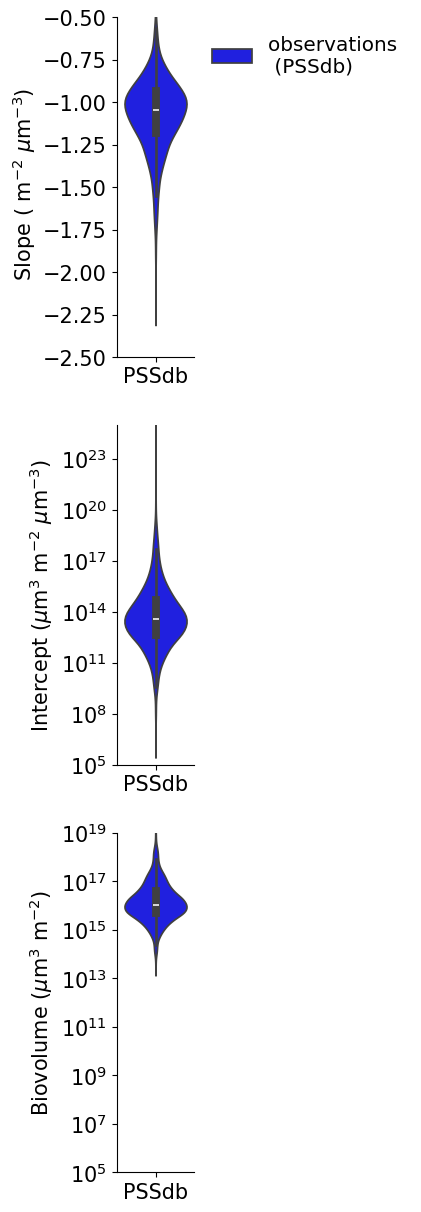

In [38]:
palette_experiments= dict(hist='rosybrown', ssp5='firebrick', obs='blue')
fig, axs = plt.subplots(nrows=3, ncols=1, figsize=(1,15))
letters = ['a.','b.','c.']
ind=0
variables = ['slope', 'intercept', 'total_biovolume']
for r, var in enumerate(variables):
    if var == 'slope':
        plot = sns.violinplot(ax = axs[r], x="source", y=var, hue="experiment",palette=palette_experiments, fill=True,  density_norm="count", data=df_pssdb) #, flierprops=dict(marker='o', markersize=0.5)
        plot.tick_params(axis='both', which='major', labelsize=15)
        sns.despine(top = True, right = True)
        axs[r].set_ylim([-2.5, -0.5])
        axs[r].set_ylabel(r' Slope ( m$^{-2}$ $\mu$m$^{-3}$)', fontsize = 15)
        L = axs[r].legend(title='', fontsize = 'x-large',  markerscale=10, frameon=False, bbox_to_anchor=(1, 1))
        #L.get_texts()[0].set_text('historical period \n (1985-2014)')
        #L.get_texts()[1].set_text('SSP5-8.5 \n (2070-2100)')
        L.get_texts()[0].set_text('observations \n (PSSdb)')

    elif var == 'intercept':
        plot = sns.violinplot(ax = axs[r], x="source", y=var, hue="experiment",palette=palette_experiments,  fill=True,   density_norm="count",data=df_pssdb, log_scale=True) #, flierprops=dict(marker='o', markersize=0.5)
        plot.tick_params(axis='both', which='major', labelsize=15)
        sns.despine(top = True, right = True)
        axs[r].set_ylabel(r'Intercept ($\mu$m$^{3}$ m$^{-2}$ $\mu$m$^{-3}$)', fontsize = 15)
        axs[r].set_ylim([1e5, 1e25])
        #axs[r].yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))
        ymin, ymax = axs[r].get_ylim()
        #tick_range = np.arange(np.floor(ymin), ymax)
        #axs[r].yaxis.set_ticks(tick_range)
        #axs[r].yaxis.set_major_locator(plt.MaxNLocator(6))
        #axs[r].yaxis.set_ticks([np.log10(x) for p in tick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)
        axs[r].get_legend().remove()
        
    elif var == 'total_biovolume':
        plot = sns.violinplot(ax = axs[r], x="source", y=var, hue="experiment",palette=palette_experiments,  fill=True,  density_norm="count",data=df_pssdb, log_scale=True) #, flierprops=dict(marker='o', markersize=0.5)
        plot.tick_params(axis='both', which='major', labelsize=15)
        sns.despine(top = True, right = True)
        axs[r].set_ylabel(r'Biovolume ($\mu$m$^{3}$ m$^{-2}$)', fontsize = 15)
        axs[r].set_ylim([1e5, 1e19])
        #axs[r].set_yscale('log')
        #axs[r].yaxis.set_major_formatter(mticker.StrMethodFormatter("$10^{{{x:.0f}}}$"))
        ymin, ymax = axs[r].get_ylim()
        #tick_range = np.arange(np.floor(ymin), ymax)
        #axs[r].yaxis.set_ticks(tick_range)
        #axs[r].yaxis.set_major_locator(plt.MaxNLocator(6))
        #axs[r].yaxis.set_ticks([np.log10(x) for p in tick_range for x in np.linspace(10 ** p, 10 ** (p + 1), 10)], minor=True)
        axs[r].get_legend().remove()
    axs[r].set_xlabel('')
        
plt.tight_layout()
plt.savefig('/Users/mc4214/GIT/CMIP6_size_spectra/figures/fig_model_avg_biovolume_PSSdb.pdf', dpi=300, bbox_inches = 'tight')

In [42]:
np.nanmedian(df_pssdb['intercept'])

37084809925507.48

In [48]:
"{:e}".format(10**(np.nanmax(np.log10(df_pssdb['intercept']))))

'1.489630e+25'

In [46]:
"{:e}".format(10**(np.nanmedian(np.log10(df_pssdb['intercept']))))

'3.708481e+13'

In [17]:
np.nanmean(df_pssdb['total_biovolume'])

1.0353723149868966e+17

In [37]:
np.nanmin(df_pssdb['total_biovolume'])

31253748727824.02

In [36]:
np.nanmax(df_pssdb['total_biovolume'])

1.0155444259234976e+19

In [ ]:
fig, axs = plt.subplots(nrows=2, ncols=8, figsize=(30,10))
variables = ['slope', 'intercept']
for c, m in enumerate(model_list):
    #print(r)
    for r, var in enumerate(variables):
        #print(c)
        ax_n = axs[r,c]
        if m == 'PSSdb':
            sns.boxplot(ax = ax_n, x="biome", y=var, color='g', order =['LC', 'HCSS', 'HCPS'],  showfliers = False, data=df_NBSS[df_NBSS['source']== m])#.set(title= (name + ' for model ' + m + ' by biome'))
        else:
            sns.boxplot(ax = ax_n, x="biome", y=var, hue="experiment",order =['LC', 'HCSS', 'HCPS'], showfliers = False, data=df_NBSS[df_NBSS['source']== m])#.set(title= (name + ' for model ' + m + ' by biome'))
            if r >0 or c >0:
                ax_n.get_legend().remove()
        ax_n.tick_params(axis='both', which='major', labelsize=15)
        if r == 0:
            ax_n.set_title(m, fontsize=20)
        else:
            ax_n.set_title('')
        if var == 'slope':
            ax_n.set_ylim([-1.9, -0.4])

            if m =='GISS':
                ax_n.set_ylim([-4, -0.5])

        elif var == 'intercept':  
            ax_n.set_ylim([7, 22])
            
            if m =='GISS':
                ax_n.set_ylim([13,40])


        if var == 'slope':
            ax_n.set_ylabel(r'Slope ( m$^{-2}$ $\mu$m$^{-3}$)', fontsize = 17)
        else:
            ax_n.set_ylabel(r'$log_{10}$(Intercept ($\mu$m$^{-3}$ m$^{-2}$ $\mu$m$^{-3}$))', fontsize = 17)
        
        ax_n.set_xlabel('')
        #ax_n.set_xticklabels('biomes', fontsize=15)
        #ax_n.set_yticklabels(var, fontsize=15)

        
            
plt.tight_layout()
plt.savefig('fig_biomes_biovol_avg.pdf', dpi=300)

In [ ]:
            if m =='UKESM':
                ax_n.set_ylim([-1.91, -1.5])
            if m =='CNRM':
                ax_n.set_ylim([-1.6, -1.4])
            if m =='IPSL':
                ax_n.set_ylim([-1.6, -1.4])
            if m =='CMCC':
                ax_n.set_ylim([-1.6, -1.4])  
            if m =='CESM':
                ax_n.set_ylim([-1.20, -0.9])
            if m =='GFDL':
                ax_n.set_ylim([-1.65, -1.5])
                
                if m =='CESM':
                ax_n.set_ylim([14.5,18])
            if m =='CMCC':
                ax_n.set_ylim([16.5,19])
            if m =='CNRM':
                ax_n.set_ylim([17.25,18.25]) 
            if m =='GFDL':
                ax_n.set_ylim([17,21.5])
                            if m =='IPSL':
                ax_n.set_ylim([16.5,18.5])
            if m =='UKESM':
                ax_n.set_ylim([18.5,21])